# Hossein Baghdadi
# Naive Bayes Project /  Manually Implementation

# Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score

# Dataset

In [2]:
data = pd.read_csv("adult.csv")
data.describe()

,Education,Status,Others,Skin Color,Sex
count,32561,32561,32561,32561,32561
unique,16,7,15,5,2
top,HS-grad,Married-civ-spouse,Prof-specialty,White,Male
freq,10501,14976,4140,27816,21790


In [3]:
data.head(10)

,Education,Status,Others,Skin Color,Sex
0,Bachelors,Never-married,Adm-clerical,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,HS-grad,Divorced,Handlers-cleaners,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
5,Masters,Married-civ-spouse,Exec-managerial,White,Female
6,9th,Married-spouse-absent,Other-service,Black,Female
7,HS-grad,Married-civ-spouse,Exec-managerial,White,Male
8,Masters,Never-married,Prof-specialty,White,Female
9,Bachelors,Married-civ-spouse,Exec-managerial,White,Male


# Find the number of Male & Female

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

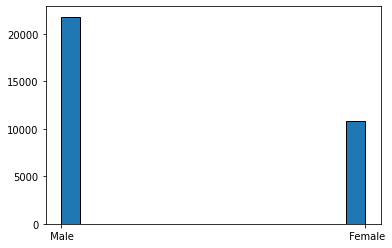

In [4]:
S = data['Sex']
plt.hist(S, bins='auto', edgecolor='black')
plt.plot

#  Is there any Nan value in our dataset ?

In [5]:
nan_value = data[data.isna().any(axis=1)]
nan_value

,Education,Status,Others,Skin Color,Sex


So, we don't have any Nan value in our dataset .

In [6]:
data.head(50)

,Education,Status,Others,Skin Color,Sex
0,Bachelors,Never-married,Adm-clerical,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,HS-grad,Divorced,Handlers-cleaners,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
5,Masters,Married-civ-spouse,Exec-managerial,White,Female
6,9th,Married-spouse-absent,Other-service,Black,Female
7,HS-grad,Married-civ-spouse,Exec-managerial,White,Male
8,Masters,Never-married,Prof-specialty,White,Female
9,Bachelors,Married-civ-spouse,Exec-managerial,White,Male


# Drop missing values

In [7]:
data = data[data['Others'] != ' ?']
data.head(50)

,Education,Status,Others,Skin Color,Sex
0,Bachelors,Never-married,Adm-clerical,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,HS-grad,Divorced,Handlers-cleaners,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
5,Masters,Married-civ-spouse,Exec-managerial,White,Female
6,9th,Married-spouse-absent,Other-service,Black,Female
7,HS-grad,Married-civ-spouse,Exec-managerial,White,Male
8,Masters,Never-married,Prof-specialty,White,Female
9,Bachelors,Married-civ-spouse,Exec-managerial,White,Male


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   30718 non-null  object
 1   Status      30718 non-null  object
 2   Others      30718 non-null  object
 3   Skin Color  30718 non-null  object
 4   Sex         30718 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


# Naive Bayes implementation

In [9]:
X = data.drop([data.columns[-1]], axis = 1)
y = data[data.columns[-1]]

In [10]:
X.head()

,Education,Status,Others,Skin Color
0,Bachelors,Never-married,Adm-clerical,White
1,Bachelors,Married-civ-spouse,Exec-managerial,White
2,HS-grad,Divorced,Handlers-cleaners,White
3,11th,Married-civ-spouse,Handlers-cleaners,Black
4,Bachelors,Married-civ-spouse,Prof-specialty,Black


In [11]:
features = list(X.columns)
print(features)

['Education', 'Status', 'Others', 'Skin Color']


In [12]:
X_train = X
y_train = y
train_size = X.shape[0]
num_feats = X.shape[1]

In [13]:
likelihoods = {}
class_priors = {}
pred_priors = {}

In [14]:
for feature in features:
    likelihoods[feature] = {}
    pred_priors[feature] = {}

    for feat_val in np.unique(X_train[feature]):
        pred_priors[feature].update({feat_val: 0})

        for outcome in np.unique(y_train):
            likelihoods[feature].update({feat_val+'_'+outcome:0})
            class_priors.update({outcome: 0})

In [15]:
print(class_priors)

{' Female': 0, ' Male': 0}


In [16]:
print(pred_priors)

{'Education': {' 10th': 0, ' 11th': 0, ' 12th': 0, ' 1st-4th': 0, ' 5th-6th': 0, ' 7th-8th': 0, ' 9th': 0, ' Assoc-acdm': 0, ' Assoc-voc': 0, ' Bachelors': 0, ' Doctorate': 0, ' HS-grad': 0, ' Masters': 0, ' Preschool': 0, ' Prof-school': 0, ' Some-college': 0}, 'Status': {' Divorced': 0, ' Married-AF-spouse': 0, ' Married-civ-spouse': 0, ' Married-spouse-absent': 0, ' Never-married': 0, ' Separated': 0, ' Widowed': 0}, 'Others': {' Adm-clerical': 0, ' Armed-Forces': 0, ' Craft-repair': 0, ' Exec-managerial': 0, ' Farming-fishing': 0, ' Handlers-cleaners': 0, ' Machine-op-inspct': 0, ' Other-service': 0, ' Priv-house-serv': 0, ' Prof-specialty': 0, ' Protective-serv': 0, ' Sales': 0, ' Tech-support': 0, ' Transport-moving': 0}, 'Skin Color': {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 0, ' Black': 0, ' Other': 0, ' White': 0}}


In [17]:
print(likelihoods)

{'Education': {' 10th_ Female': 0, ' 10th_ Male': 0, ' 11th_ Female': 0, ' 11th_ Male': 0, ' 12th_ Female': 0, ' 12th_ Male': 0, ' 1st-4th_ Female': 0, ' 1st-4th_ Male': 0, ' 5th-6th_ Female': 0, ' 5th-6th_ Male': 0, ' 7th-8th_ Female': 0, ' 7th-8th_ Male': 0, ' 9th_ Female': 0, ' 9th_ Male': 0, ' Assoc-acdm_ Female': 0, ' Assoc-acdm_ Male': 0, ' Assoc-voc_ Female': 0, ' Assoc-voc_ Male': 0, ' Bachelors_ Female': 0, ' Bachelors_ Male': 0, ' Doctorate_ Female': 0, ' Doctorate_ Male': 0, ' HS-grad_ Female': 0, ' HS-grad_ Male': 0, ' Masters_ Female': 0, ' Masters_ Male': 0, ' Preschool_ Female': 0, ' Preschool_ Male': 0, ' Prof-school_ Female': 0, ' Prof-school_ Male': 0, ' Some-college_ Female': 0, ' Some-college_ Male': 0}, 'Status': {' Divorced_ Female': 0, ' Divorced_ Male': 0, ' Married-AF-spouse_ Female': 0, ' Married-AF-spouse_ Male': 0, ' Married-civ-spouse_ Female': 0, ' Married-civ-spouse_ Male': 0, ' Married-spouse-absent_ Female': 0, ' Married-spouse-absent_ Male': 0, ' Never

# P(y) - Prior Class Probability

In [18]:
for outcome in np.unique(y_train):
    outcome_count = sum(y_train == outcome)
    class_priors[outcome] = outcome_count / train_size

In [19]:
print(class_priors)

{' Female': 0.3232632332834169, ' Male': 0.6767367667165831}


# P(x|y) - Likelihood

In [20]:
for feature in features:
    for outcome in np.unique(y_train):
        outcome_count = sum(y_train == outcome)
        feat_likelihood = X_train[feature][y_train[y_train == outcome].index.values.tolist()].value_counts().to_dict()
        print(feat_likelihood)
        for feat_val, count in feat_likelihood.items():
            likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count

{' HS-grad': 3144, ' Some-college': 2539, ' Bachelors': 1552, ' Masters': 520, ' Assoc-voc': 461, ' Assoc-acdm': 401, ' 11th': 372, ' 10th': 253, ' 7th-8th': 137, ' 12th': 126, ' 9th': 120, ' Prof-school': 89, ' Doctorate': 85, ' 5th-6th': 74, ' 1st-4th': 43, ' Preschool': 14}
{' HS-grad': 6824, ' Some-college': 4236, ' Bachelors': 3630, ' Masters': 1155, ' Assoc-voc': 860, ' 11th': 684, ' Assoc-acdm': 619, ' 10th': 578, ' Prof-school': 469, ' 7th-8th': 436, ' 9th': 343, ' Doctorate': 313, ' 12th': 267, ' 5th-6th': 229, ' 1st-4th': 113, ' Preschool': 32}
{' Never-married': 4380, ' Divorced': 2552, ' Married-civ-spouse': 1512, ' Widowed': 695, ' Separated': 587, ' Married-spouse-absent': 192, ' Married-AF-spouse': 12}
{' Married-civ-spouse': 12827, ' Never-married': 5532, ' Divorced': 1706, ' Separated': 372, ' Married-spouse-absent': 197, ' Widowed': 145, ' Married-AF-spouse': 9}
{' Adm-clerical': 2537, ' Other-service': 1800, ' Prof-specialty': 1515, ' Sales': 1263, ' Exec-managerial'

In [21]:
print(likelihoods)

{'Education': {' 10th_ Female': 0.025478348439073515, ' 10th_ Male': 0.027804502597652492, ' 11th_ Female': 0.03746223564954683, ' 11th_ Male': 0.03290359822974793, ' 12th_ Female': 0.012688821752265862, ' 12th_ Male': 0.01284394843178757, ' 1st-4th_ Female': 0.00433031218529708, ' 1st-4th_ Male': 0.005435828362516837, ' 5th-6th_ Female': 0.0074521651560926485, ' 5th-6th_ Male': 0.01101597075235713, ' 7th-8th_ Female': 0.01379657603222558, ' 7th-8th_ Male': 0.020973638637675582, ' 9th_ Female': 0.012084592145015106, ' 9th_ Male': 0.016499903790648453, ' Assoc-acdm_ Female': 0.04038267875125881, ' Assoc-acdm_ Male': 0.029776794304406388, ' Assoc-voc_ Female': 0.04642497482376636, ' Assoc-voc_ Male': 0.04137002116605734, ' Bachelors_ Female': 0.15629405840886204, ' Bachelors_ Male': 0.17461997306138158, ' Doctorate_ Female': 0.008559919436052367, ' Doctorate_ Male': 0.015056763517413892, ' HS-grad_ Female': 0.3166163141993958, ' HS-grad_ Male': 0.32826630748508756, ' Masters_ Female': 0.

# P(x) - Evidence

In [22]:
for feature in features:
    feat_vals = X_train[feature].value_counts().to_dict()
    print(feat_vals)
    for feat_val, count in feat_vals.items():
        pred_priors[feature][feat_val] = count/train_size

{' HS-grad': 9968, ' Some-college': 6775, ' Bachelors': 5182, ' Masters': 1675, ' Assoc-voc': 1321, ' 11th': 1056, ' Assoc-acdm': 1020, ' 10th': 831, ' 7th-8th': 573, ' Prof-school': 558, ' 9th': 463, ' Doctorate': 398, ' 12th': 393, ' 5th-6th': 303, ' 1st-4th': 156, ' Preschool': 46}
{' Married-civ-spouse': 14339, ' Never-married': 9912, ' Divorced': 4258, ' Separated': 959, ' Widowed': 840, ' Married-spouse-absent': 389, ' Married-AF-spouse': 21}
{' Prof-specialty': 4140, ' Craft-repair': 4099, ' Exec-managerial': 4066, ' Adm-clerical': 3770, ' Sales': 3650, ' Other-service': 3295, ' Machine-op-inspct': 2002, ' Transport-moving': 1597, ' Handlers-cleaners': 1370, ' Farming-fishing': 994, ' Tech-support': 928, ' Protective-serv': 649, ' Priv-house-serv': 149, ' Armed-Forces': 9}
{' White': 26301, ' Black': 2909, ' Asian-Pac-Islander': 974, ' Amer-Indian-Eskimo': 286, ' Other': 248}


In [23]:
print(pred_priors)

{'Education': {' 10th': 0.027052542483234587, ' 11th': 0.034377238101438896, ' 12th': 0.012793801679796862, ' 1st-4th': 0.005078455628621655, ' 5th-6th': 0.009863923432515138, ' 7th-8th': 0.01865355817436031, ' 9th': 0.015072595872127092, ' Assoc-acdm': 0.033205286802526206, ' Assoc-voc': 0.04300410182954619, ' Bachelors': 0.16869587863793215, ' Doctorate': 0.012956572693534736, ' HS-grad': 0.32450029298782473, ' Masters': 0.05452828960218764, ' Preschool': 0.0014974933263884368, ' Prof-school': 0.018165245133146688, ' Some-college': 0.22055472361481868}, 'Status': {' Divorced': 0.13861579529917312, ' Married-AF-spouse': 0.000683638257699069, ' Married-civ-spouse': 0.4667947131974738, ' Married-spouse-absent': 0.012663584868806563, ' Never-married': 0.32267725763396055, ' Separated': 0.03121948043492415, ' Widowed': 0.02734553030796276}, 'Others': {' Adm-clerical': 0.12272934435835667, ' Armed-Forces': 0.0002929878247281724, ' Craft-repair': 0.13343967706230875, ' Exec-managerial': 0.1

# Calculates Posterior probability P(y|x)

In [24]:
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

qu = X_test.sample(n=1)   ### qu = x_test
qu = np.array(qu) 

## I am considering 0 for this case but usually it will change depending upon the task
m = 0  ## m = 2
p = 0  ## p = 1/m
for query in qu:
    probs_outcome = {}
    for outcome in np.unique(y_train):
        prior = class_priors[outcome]
        likelihood = 1
        evidence = 1

        for feat, feat_val in zip(features, query):
            likelihood *= likelihoods[feat][feat_val + '_' + outcome]
            evidence *= pred_priors[feat][feat_val]

        posterior = (likelihood * prior + m*p) / (evidence + m)
        
        probs_outcome[outcome] = posterior
    print(probs_outcome)
    result = max(probs_outcome, key = lambda x: probs_outcome[x])
    results.append(result)
print(results)

{' Female': 1.1573662525578023, ' Male': 0.044251278303508584}
[' Female']
